Epoch [0/20000]  Loss D: 1.3998, Loss G: 0.7251
Epoch [1000/20000]  Loss D: 1.7178, Loss G: 0.7669
Epoch [2000/20000]  Loss D: 1.3854, Loss G: 0.8768
Epoch [3000/20000]  Loss D: 0.6599, Loss G: 1.5454
Epoch [4000/20000]  Loss D: 0.8485, Loss G: 1.1738
Epoch [5000/20000]  Loss D: 1.1487, Loss G: 1.0241
Epoch [6000/20000]  Loss D: 1.2313, Loss G: 0.9495
Epoch [7000/20000]  Loss D: 0.7434, Loss G: 1.2805
Epoch [8000/20000]  Loss D: 1.1273, Loss G: 1.0027
Epoch [9000/20000]  Loss D: 1.0846, Loss G: 1.3031
Epoch [10000/20000]  Loss D: 0.9381, Loss G: 1.2785
Epoch [11000/20000]  Loss D: 0.8246, Loss G: 1.8039
Epoch [12000/20000]  Loss D: 0.8474, Loss G: 1.3605
Epoch [13000/20000]  Loss D: 0.9206, Loss G: 1.4847
Epoch [14000/20000]  Loss D: 0.7973, Loss G: 1.2467
Epoch [15000/20000]  Loss D: 0.8256, Loss G: 1.2983
Epoch [16000/20000]  Loss D: 0.7782, Loss G: 1.5908
Epoch [17000/20000]  Loss D: 0.7460, Loss G: 1.6596
Epoch [18000/20000]  Loss D: 0.7205, Loss G: 1.4523
Epoch [19000/20000]  Loss

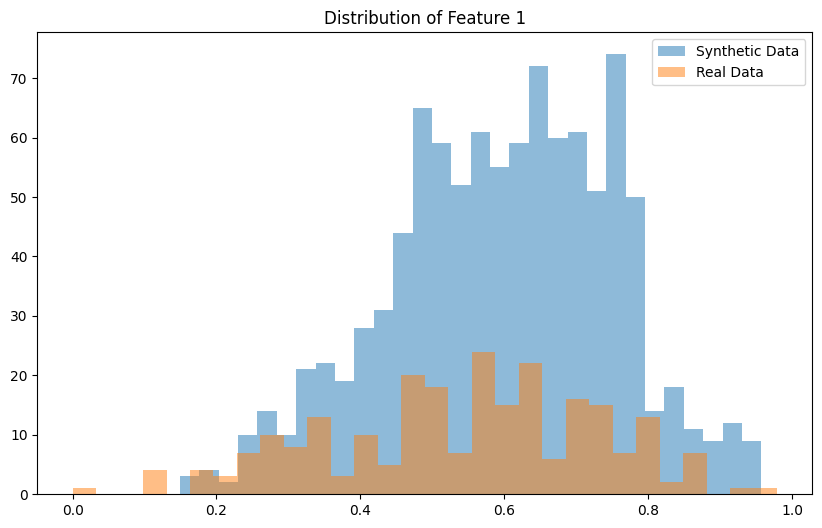

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/heart.csv")

# Normalize the features
X = df.drop(["target"], axis=1)
X = (X - X.min()) / (X.max() - X.min())

# Convert DataFrame to numpy array
X = X.values.astype(np.float32)

# Train-test split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=4)

# Hyperparameters
latent_dim = 10  # Dimension of noise vector
n_epochs = 20000  # Number of training epochs
batch_size = 64  # Batch size
lr = 0.0002  # Learning rate

# Generator model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, X_train.shape[1]),
            nn.Tanh()  # Output range between -1 and 1
        )

    def forward(self, z):
        return self.model(z)

# Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Output range between 0 and 1
        )

    def forward(self, x):
        return self.model(x)

# Initialize models
generator = Generator()
discriminator = Discriminator()

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss()

# Training the GAN
for epoch in range(n_epochs):
    # Train Discriminator
    for _ in range(1):  # Train D once for every G training
        # Real samples
        real_data = torch.tensor(X_train[np.random.randint(0, X_train.shape[0], batch_size)], dtype=torch.float32)
        real_labels = torch.ones((batch_size, 1))

        # Fake samples
        noise = torch.randn(batch_size, latent_dim)
        fake_data = generator(noise)
        fake_labels = torch.zeros((batch_size, 1))

        # Compute loss for Discriminator
        optimizer_D.zero_grad()
        output_real = discriminator(real_data)
        output_fake = discriminator(fake_data.detach())
        loss_D = criterion(output_real, real_labels) + criterion(output_fake, fake_labels)
        loss_D.backward()
        optimizer_D.step()

    # Train Generator
    optimizer_G.zero_grad()
    output = discriminator(fake_data)
    loss_G = criterion(output, real_labels)
    loss_G.backward()
    optimizer_G.step()

    # Print losses and save generated images
    if epoch % 1000 == 0:
        print(f'Epoch [{epoch}/{n_epochs}]  Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}')

# Generate synthetic data
with torch.no_grad():
    noise = torch.randn(1000, latent_dim)
    synthetic_data = generator(noise).numpy()

# Convert to DataFrame for further analysis
synthetic_df = pd.DataFrame(synthetic_data, columns=df.columns[:-1])
print(synthetic_df.head())

# Optional: Visualize synthetic data
plt.figure(figsize=(10, 6))
plt.hist(synthetic_df.iloc[:, 0], bins=30, alpha=0.5, label='Synthetic Data')
plt.hist(X_train[:, 0], bins=30, alpha=0.5, label='Real Data')
plt.title('Distribution of Feature 1')
plt.legend()
plt.show()


Epoch [0/100], d_loss: 0.9472, g_loss: 0.5025
Epoch [10/100], d_loss: 0.4463, g_loss: 1.0544
Epoch [20/100], d_loss: 0.1981, g_loss: 1.7401
Epoch [30/100], d_loss: 0.0928, g_loss: 2.4449
Epoch [40/100], d_loss: 0.0409, g_loss: 3.2271
Epoch [50/100], d_loss: 0.0259, g_loss: 3.6817
Epoch [60/100], d_loss: 0.0141, g_loss: 4.2797
Epoch [70/100], d_loss: 0.0106, g_loss: 4.5677
Epoch [80/100], d_loss: 0.0074, g_loss: 4.9179
Epoch [90/100], d_loss: 0.0063, g_loss: 5.0729
Accuracy: 0.8197

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



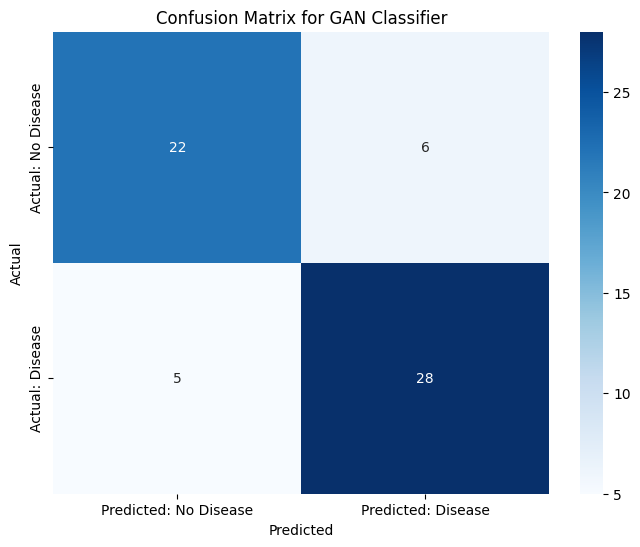

Confusion Matrix:
 [[22  6]
 [ 5 28]]


In [4]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset

# Load dataset
df = pd.read_csv("/heart.csv")

# Define target and features
y = df["target"].values
X = df.drop(["target"], axis=1).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)

# Create a custom dataset
class HeartDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets
train_dataset = HeartDataset(X_train, y_train)
test_dataset = HeartDataset(X_test, y_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define a generator
class Generator(nn.Module):
    def __init__(self, input_size, output_size):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_size),
            nn.Tanh()  # Output between -1 and 1
        )

    def forward(self, x):
        return self.fc(x)

# Define a discriminator
class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Output probability
        )

    def forward(self, x):
        return self.fc(x)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate generator and discriminator
generator = Generator(input_size=10, output_size=X_train.shape[1]).to(device)  # Adjust input_size if needed
discriminator = Discriminator(input_size=X_train.shape[1]).to(device)

# Loss function and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.001)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.001)

# Function to train GAN
def train_gan(epochs, train_loader):
    for epoch in range(epochs):
        for real_data, _ in train_loader:
            batch_size = real_data.size(0)
            real_data = real_data.float().to(device)

            # Create labels
            real_labels = torch.ones(batch_size, 1).to(device)
            fake_labels = torch.zeros(batch_size, 1).to(device)

            # Train Discriminator
            optimizer_D.zero_grad()
            outputs = discriminator(real_data)
            d_loss_real = criterion(outputs, real_labels)

            noise = torch.randn(batch_size, 10).to(device)  # Random noise
            fake_data = generator(noise)
            outputs = discriminator(fake_data.detach())
            d_loss_fake = criterion(outputs, fake_labels)

            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            optimizer_D.step()

            # Train Generator
            optimizer_G.zero_grad()
            outputs = discriminator(fake_data)
            g_loss = criterion(outputs, real_labels)  # We want generator to fool the discriminator
            g_loss.backward()
            optimizer_G.step()

        if epoch % 10 == 0:
            print(f'Epoch [{epoch}/{epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')

# Train GAN
train_gan(epochs=100, train_loader=train_loader)

# Generate synthetic data
def generate_synthetic_data(generator, num_samples):
    generator.eval()
    noise = torch.randn(num_samples, 10).to(device)  # Generate noise
    with torch.no_grad():
        generated_data = generator(noise)
    return generated_data.cpu().numpy()

# Generate additional synthetic samples
synthetic_samples = generate_synthetic_data(generator, 100)  # Generate 100 synthetic samples
synthetic_labels = np.random.randint(0, 2, size=100)  # Random labels for synthetic data

# Combine real and synthetic data
X_combined = np.vstack((X_train, synthetic_samples))
y_combined = np.hstack((y_train, synthetic_labels))

# Create combined dataset and data loader
combined_dataset = HeartDataset(X_combined, y_combined)
combined_loader = DataLoader(combined_dataset, batch_size=16, shuffle=True)

# Define a simple classifier
class SimpleClassifier(nn.Module):
    def __init__(self, input_size):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Instantiate and train the classifier
classifier = SimpleClassifier(input_size=X_combined.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

# Training function for classifier
def train_classifier(classifier, combined_loader, optimizer, criterion, epochs=50):
    classifier.train()
    for epoch in range(epochs):
        for inputs, labels in combined_loader:
            inputs, labels = inputs.float().to(device), labels.float().to(device).view(-1, 1)

            optimizer.zero_grad()
            outputs = classifier(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

# Train the classifier
train_classifier(classifier, combined_loader, optimizer, criterion, epochs=50)

# Evaluate the classifier
def evaluate_classifier(classifier, test_loader):
    classifier.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.float().to(device)
            outputs = classifier(inputs)
            predicted = (outputs > 0.5).cpu().numpy()
            y_true.extend(labels.numpy())
            y_pred.extend(predicted)

    return np.array(y_true), np.array(y_pred).flatten()

# Evaluate the classifier
y_true, y_pred = evaluate_classifier(classifier, test_loader)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: No Disease', 'Predicted: Disease'],
            yticklabels=['Actual: No Disease', 'Actual: Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for GAN Classifier')
plt.show()

# Print the confusion matrix (optional)
print("Confusion Matrix:\n", cm)
